# Clustering

Reduce the dimension of the digits data using clusering technique.

In [2]:
# Initial imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load dataset
from sklearn.datasets import load_digits

digits = load_digits()

In [4]:
# Assign data
X = digits.data
y = digits.target

## Test-train split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


## KMeans clustering

In [7]:
from sklearn.cluster import KMeans

inertias = []

for k in range(10, 51, 5):
    kmeans = KMeans(random_state=0, n_clusters= k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

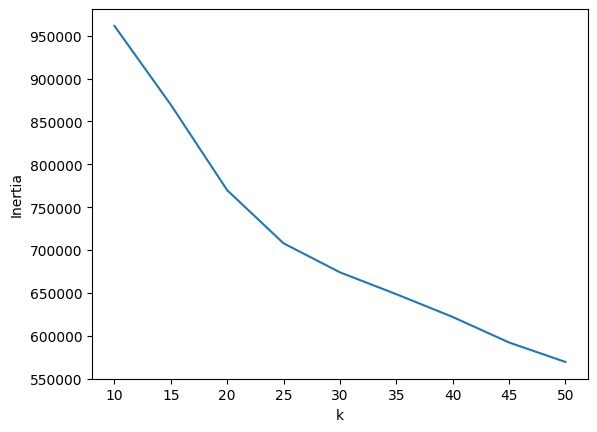

In [11]:
# Plot
plt.plot(range(10, 51, 5), inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid

## Select clusters

Use the elbow plot above to select 15 as the number of clusters

In [12]:
# Using 15 clusters

kmeans = KMeans(random_state=0, n_clusters=15)

transformed = kmeans.fit_transform(X_train)
print(transformed[0])

[50.89276395 51.80396866 48.9661621  29.353738   54.27848993 48.66854636
 52.0290442  41.48375477 55.77312529 48.99333597 53.6431979  49.33825116
 45.42037407 43.41541974 45.08972749]


In [13]:
# find the smallest cluster
X_train0_2D = X_train[0].reshape((1, -1))
print(kmeans.predict(X_train0_2D))

[3]


## Pipeline

In [14]:
# create pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline(
    [('cluster', KMeans(random_state=0, n_clusters=15)),
     ('scaler', StandardScaler()),
     ('svm', SVC(random_state=0))]
)

## Grid Search

Find the best parameter using grid search

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'svm__C' : [1, 5, 8, 10],
    'svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(pipeline, params, cv = 4, scoring= 'accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9784257969668833
{'svm__C': 5, 'svm__kernel': 'rbf'}
